In [1]:
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from bitmex_limited import BitmexLimited
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 25, 15


env = DummyVecEnv([lambda: BitmexLimited()])

model = PPO(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=50000)
model.save("testmodel")
env = model.get_env()


del model  # remove to demonstrate saving and loading


/home/arien/anaconda3/envs/torch/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float64
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Using cuda device
-----------------------------
| time/              |      |
|    fps             | 962  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 897        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.03504017 |
|    clip_fraction        | 0.165      |
|    clip_range           | 0.2        |
|    entropy_loss         | -2.84      |
|    explained_variance   | -1         |
|    learning_rate        | 0.0003     |
|    loss                 | -0.0518    |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0367    |
|    std                  | 0.999      |
|    value_loss           | 0.149      |
----------------------------------

/home/arien/anaconda3/envs/torch/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float64
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


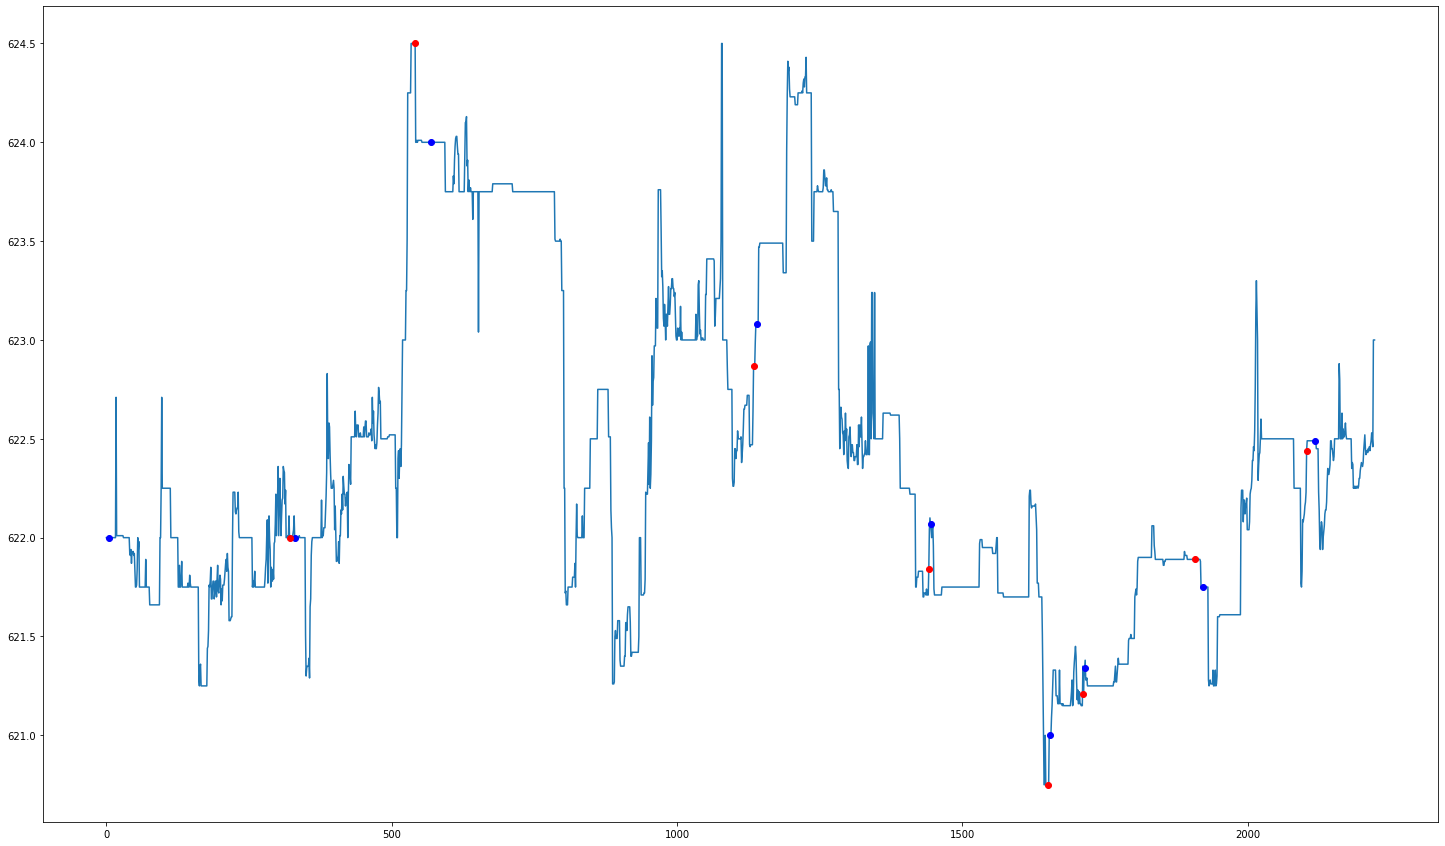

Balance 0.008945368028951548


In [2]:
model = PPO.load("testmodel")

env2 = DummyVecEnv([lambda: BitmexLimited(train_mode=False)])
obs = env2.reset()

n_steps = 1440 * 10
for x in range(n_steps):
    # Random action
    #action = env.action_space.sample()
    action, _states = model.predict(obs)
    obs, reward, done, info = env2.step(action)
    if x == n_steps - 1:
        env2.render()
    if done:
        print('Done')
        obs = env2.reset()